# 问答

## 随机从某超市抽取10个顾客，得到他们购物所花费的金额（单位：元）

- 数据：388，24，152，63.2，224.6，26，69，70，138，213

- 请问我们可以用哪些统计量，分析该组数据？

可以从两个方向来对一组数据进行观察


- 聚集程度
  - 均值：反映顾客的平均消费水平，是较为常用的统计量
  - 众数：一组数据出现的最多的某个数字。
  - 中位数：当顾客消费金额分布非常分散或者存在较多明显的离群点时，中位数更能体现"平均"水平
  
    
- 离散程度
  - 方差/标准差：用以衡量顾客之间消费的差异程度
  - 分位数（常用四分位数）：辅助中位数，进一步了解数据分布的情况
  - 极差： 反映顾客消费的金额的整体区间大小
  - 最大最小值：反映顾客消费金额的上限和下限  
  - 离群值：反映比大部分人平均消费水平要高得多的土豪和低得多的贫困人口的情况

## 试从可视化的角度分别解读这些统计量刻画了数据分布的哪些特征？

- 对直方图的影响：
   - 均值，中位数，众数反映数据分布的平均水平，通常来讲分布中的的最高点一般是众数，这点可以从峰度这个统计量来看到。但现实世界中，一组数组的众数与均值，中位数重叠情况较不常见，常出现左偏或右偏的情况，因此可以借助偏度这个统计量来衡量分布的偏态。另外如果一组数据中的方差/标准差越小，数据越集中，分布形态越趋于瘦高（集中），反之则趋于矮胖（分散）。 
   
   
- 对箱线图的影响：
   - 离群点分布在上边缘和下边缘以外的部分，1/4、3/4，以及中位数等反映数据的分布情况，箱体分布的均匀程度对应于数据分布的左偏和右偏

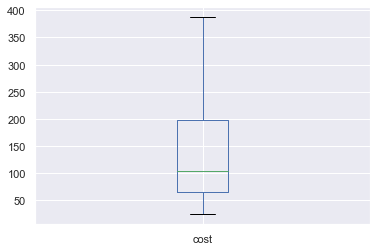

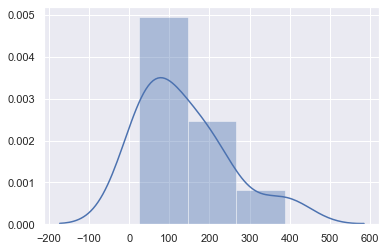

In [1]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

df=pd.DataFrame([388,24,152,63.2,224.6,26,69,70,138,213],columns=['cost'])
df.boxplot()
plt.subplots()
sns.distplot(df)

- 对直方图的影响：   
分布中的的最高点一般是众数,众数与均值，中位数重叠情况较不常见，常出现左偏或右偏的情况，因此可以借助偏度这个统计量来衡量分布的偏态。另外如果一组数据中的方差/标准差越小，数据越集中，分布形态越趋于瘦高（集中），反之则趋于矮胖（分散）。


- 对箱线图的影响：   
离群点分布在上边缘和下边缘以外的部分，1/4、3/4，以及中位数等反映数据的分布情况，箱体分布的均匀程度对应于数据分布的左偏和右偏。最值最值可以通过箱体与上下限的大小判断出来

## 下表是2006年北京上海和天津，按收入法计算的地区生产总值（按当年价格计算）数据。

|地  区|劳动者报酬|生产税净额|固定资产折旧|营业盈余|
|:---|:---|:---|:---|:---|
|北京|3496.57|1161.55|1251.09|1961.07|
|天津|1383.36	|775.09|595.09|1605.61|			
|上海|3756.56|1623.36|1730.51|3255.94|	

- 请给出至少三种<b>适用</b>于描述上述数据所用的可视化图形？并简要说明这些方法的特点和用途。
 				



In [2]:
data = {"city" : ["Beijing", "Tianjin", "Shanghai"],
        "remuneration" : [3496.57, 1383.36, 3756.56],
        "tax" : [1161.55, 775.09, 1623.36],
        "depreciation" : [1251.09, 595.09, 1730.51],
        "surplus" : [1961.07, 1605.61, 3255.94]}
GDP_data = pd.DataFrame(data).set_index('city')
GDP_data

,remuneration,tax,depreciation,surplus
city,,,,
Beijing,3496.57,1161.55,1251.09,1961.07
Tianjin,1383.36,775.09,595.09,1605.61
Shanghai,3756.56,1623.36,1730.51,3255.94


**分组柱状图：**
>特点：以长方形的长度为变量的表达图形的统计报告图，由一系列高度不等的纵向条纹 表示数据分布的情况，并按分组显示在横坐标上

>用途：用来横向比较不同地区在劳动者报酬、生产税净额、固定资产折旧、营 业盈余上的差异

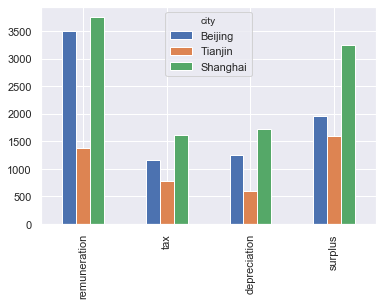

In [3]:
GDP_data.T.plot.bar()

**堆叠柱状图：**
>特点：柱状图的柱子高度表示总值的大小，柱身不同颜色的柱子高度表示各个组成部分的 比例

>用途：既可以比较不同地区的GDP的差异，又可以展示不同地区内劳动者报酬、生产税净 额、固定资产折旧、营业盈余分别占GDP的比例。

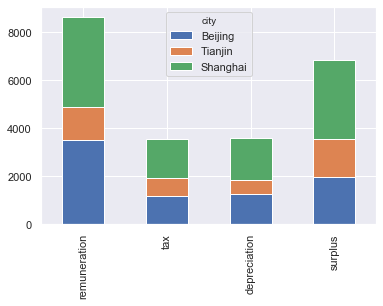

In [4]:
GDP_data.T.plot.bar(stacked=True)

**饼图：**
>特点：用整个圆表示总数，用圆内各个扇形的大小表示各部分数量占总数的百分数

>用途：通过扇形统计图可以很清楚地表示出劳动者报酬、生产税净额、固定资产折旧、营 业盈余分别占GDP的比例。

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C9D2703DD8>],
      dtype=object)

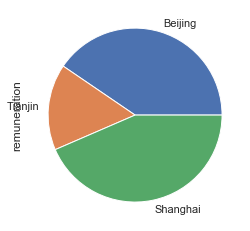

In [5]:
GDP_data.T.loc['remuneration'].plot.pie(subplots=True)

## 试述有哪些方法可以判断一组数据是否服从正态分布？

- 图示法
   - 图示法相比较直观，快速，简单得从图中可以直接判断，无需计算。缺点是不够精确
   - 直方图：对变量的分布进行绘制的图形，可以快速查看是否大致符合正态分布。
   - QQ图，pp图:如果被检验的数据符合所指定的分布，则代表样本数据的点应当基本在代表理论分布的对角线上。
   
   
- 检验法
   - 检验法比图示法严谨，常用于对于数据分布要求严格的场景。
   - W检验（Shapiro-Wilk检验），基于相关性的检验法。其结果为相关系数，它越接近1就越表明数据和正态分布拟合得越好。
   - K-S检验:&emsp;首先假设数据是符合正态分布的，通过p值是否大于0.05来判断是否拒绝原假设。一般情况下K-S用于大样本；S-W用于小样本

## 试述对置信水平和置信区间的理解？

置信水平也称为可靠度，或置信度、置信系数，置信区间是指在某一置信水平下，样本统计值与总体参数值间误差范围。置信区间越大，置信水平越高。

置信水平和置信区间是涉及到点估计和区间估计的概念 ，即在抽样对总体参数作出估计时，由于样本的随机性，其结论总是不确定的。

因此，采用一种概率的陈述方法，也就是数理统计中的区间估计法，即估计值与总体参数在一定允许的误差范围以内，其相应的概率有多大，这个相应的概率称作置信度。 置信水平是指总体参数值落在样本统计值某一区内的概率； 

## 实战

### (注意:要求使用seaborn库进行)

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (9,4)

### 航班乘客变化分析

- 载入相应绘图库及航班乘客数据（flights）

In [7]:
flights_df = sns.load_dataset("flights")
flights_df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


- 分析年度乘客总量变化情况（折线图）

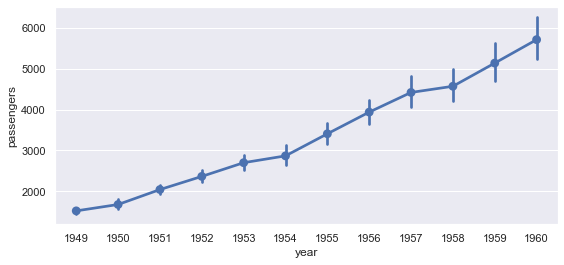

In [8]:
sns.pointplot(x='year',y='passengers',data=flights_df,size=6,aspect=1.5,estimator=sum)

结论：每年的乘客均量是逐年呈线性递增的,且每年各月份的波动情况(方差)在逐年增大

- 分析乘客在一年中各月份的分布（柱状图）

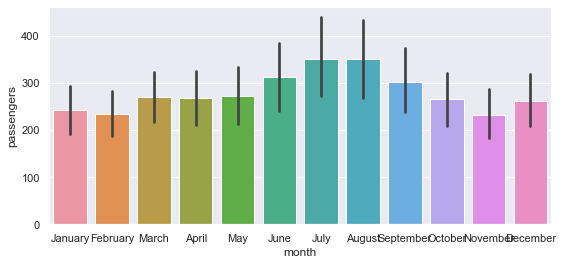

In [9]:
sns.barplot(x='month',y='passengers',data=flights_df)

结论：每年的航空公司的旺季大约从6月份开始持续到8月底，9月份客流量开始下降，10月份后会进入淡季，12月到来年5月保持较平稳的客流状态


### 鸢尾花花型尺寸分析

* 载入iris数据集
* 萼片（sepal）和花瓣（petal）的大小关系（散点图）
- 不同种类鸢尾花萼片和花瓣大小的分布情况（柱状图或者箱式图）
* 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）

In [10]:
data_iris = sns.load_dataset("iris")
data_iris['sepal_size'] = data_iris['sepal_length'] * data_iris['sepal_width']
data_iris['petal_size'] = data_iris['petal_length'] * data_iris['petal_width']
data_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_size,petal_size
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28


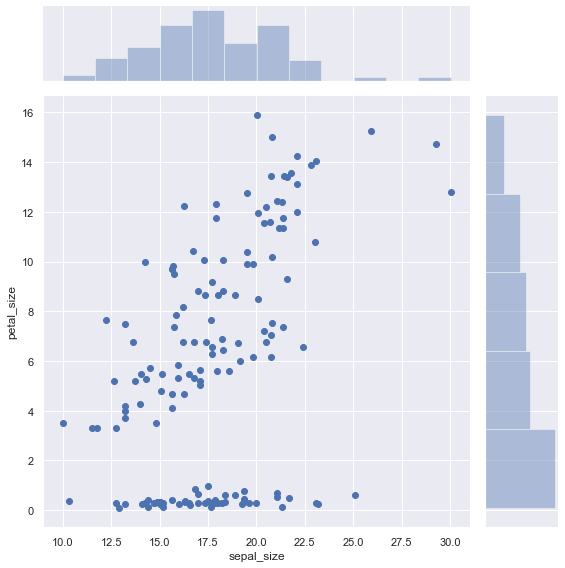

In [11]:
# 萼片（sepal）和花瓣（petal）的大小关系（散点图）
sns.jointplot(x='sepal_size', y='petal_size', data=data_iris, size=8)

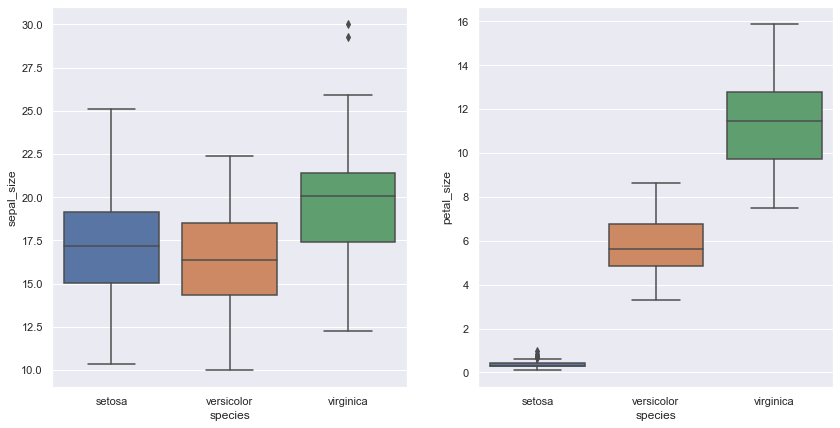

In [12]:
# 不同种类鸢尾花萼片和花瓣大小的分布情况
f, axes = plt.subplots(1,2,figsize=(14,7))
sns.boxplot(x='species', y='sepal_size', data=data_iris, ax=axes[0])
sns.boxplot(x='species', y='petal_size', data=data_iris, ax=axes[1])

1. 从花萼片大小来看，virginoca的花萼片一般要比另外两种花大一些，且大部分的virginoca的花萼片都比较大(箱线图右偏)；setosa的花萼片大小居中，versicolor相对较小<br>
2. 从花瓣大小来看，virginoca的花瓣比另外两种大得多；versicolor的花瓣大小居中，setosa的花瓣最小，且几乎所有setosa样本的花瓣大小都集中在0.5左右(箱体非常短)

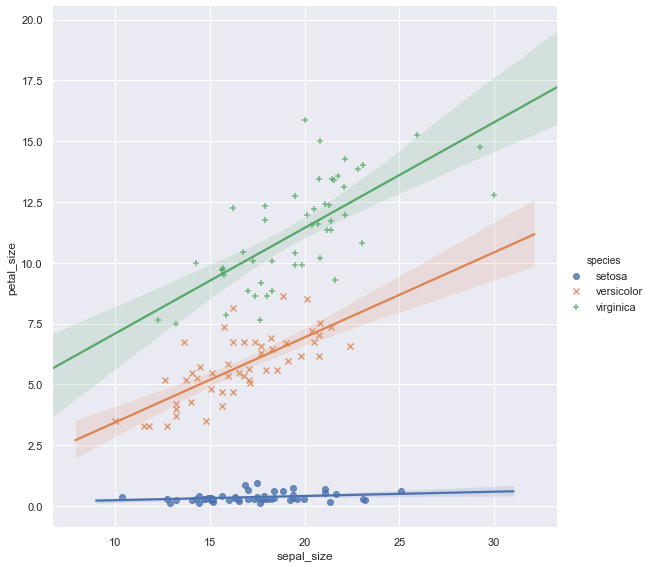

In [13]:
# 不同种类（species）鸢尾花萼片和花瓣的大小关系（分类散点子图）
sns.lmplot(x='sepal_size',
           y='petal_size', 
           hue='species', 
           data=data_iris, 
           size=8, 
           markers=['o','x','+'])

总结：可以看到，在给定花的种类的情况下， 花萼片和花瓣的大小呈现出比较明显的线性关系。如果是做花的种类的分类，可以考虑花萼片大小和花瓣大小这两个组合特征

### 餐厅小费情况分析
* 载入tips数据集
* 小费和总消费之间的关系（散点图）
* 男性顾客和女性顾客，谁更慷慨（分类箱式图）
* 抽烟与否是否会对小费金额产生影响（分类箱式图）
* 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
* 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
* 就餐人数是否会对慷慨度产生影响（分类箱式图）
* 性别+抽烟的组合因素对慷慨度的影响（分组柱状图）

In [14]:
data_tips = sns.load_dataset("tips")
data_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


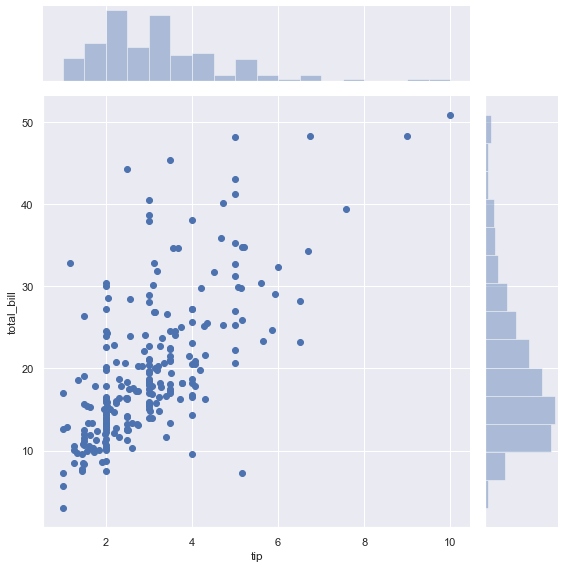

In [15]:
# 小费和总消费之间的关系
sns.jointplot(x='tip',y='total_bill',data=data_tips, size=8)

总结：小费金额和总消费之间表现出较明显的线性关系，说明一般就餐金额比较大的顾客所给的小费会比较多

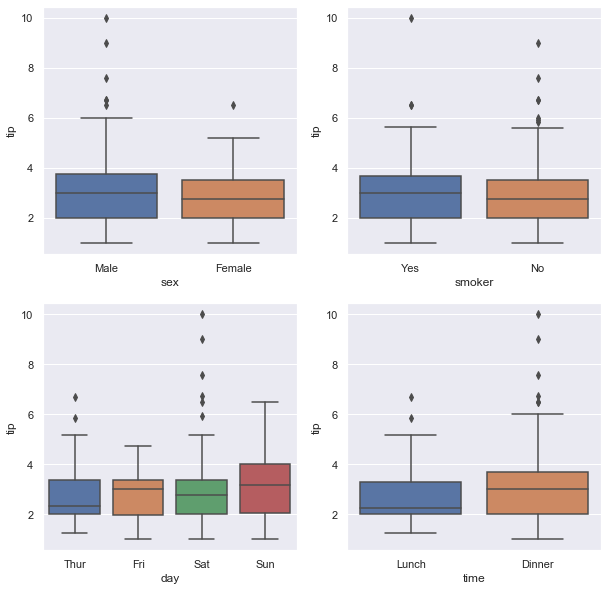

In [16]:
# 男性顾客和女性顾客，谁更慷慨（分类箱式图）
# 抽烟与否是否会对小费金额产生影响（分类箱式图）
# 工作日和周末，什么时候顾客给的小费更慷慨（分类箱式图）
# 午饭和晚饭，哪一顿顾客更愿意给小费（分类箱式图）
fg, axes = plt.subplots(2,2,figsize=(10,10))
x_labels = ['sex','smoker','day','time']
y_labels = ['tip']
for i,ax in enumerate(axes.flatten()):
    ax = sns.boxplot(x=x_labels[i], y=y_labels[0], data=data_tips, ax=ax)

结论：
1. 男性顾客相对于女性顾客给的小费会多一些，且大部分的男性顾客给的小费都算比较高(箱型图右偏)<br>
2. 抽烟的顾客比没有抽烟的顾客会慷慨一些，且抽烟顾客给的小费都算比较高<br>
3. 星期天的顾客给的小费会比周四到周六的顾客多一些，周六的土豪貌似比较多(离群点)，周四的顾客大部分给的小费都比较少<br>
4. 晚餐顾客给的小费比午餐的顾客多，且午餐大部分顾客给的小费都比较少<br>

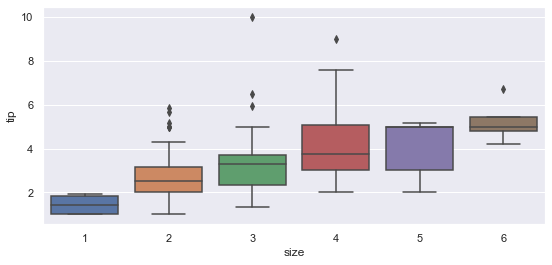

In [17]:
#就餐人数是否会对慷慨度产生影响（分类箱式图）
sns.boxplot(x='size', y='tip', data=data_tips)

 总结：一般情况下就餐人数越多，顾客给的小费越多

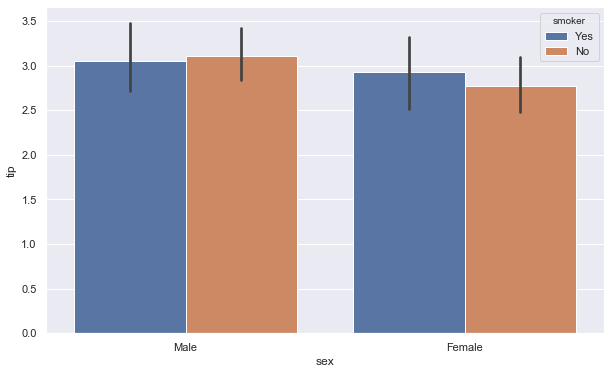

In [18]:
# hue 参数控制分组绘图
fg = plt.figure(figsize=(10,6))
ax = fg.add_subplot(111)
sns.barplot(x='sex', y='tip', hue='smoker',data=data_tips,ax=ax)
ax.legend(loc='upper right',title='smoker')

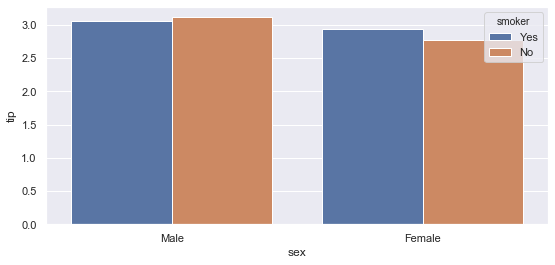

In [19]:
sns.barplot(data=data_tips, x='sex', y='tip',hue='smoker',ci=None)

总结：
1. 对于男性顾客来说，抽烟和不抽烟对给的小费的多少没有明显差别<br>
2. 对于女性顾客来讲，抽烟的顾客一般来说比不抽烟的顾客要有钱一点，给的小费也相对多一点

### 泰坦尼克号海难幸存状况分析
* 不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
* 不同性别的幸存比例（堆积柱状图）
* 幸存和遇难乘客的票价分布（分类箱式图）
* 幸存和遇难乘客的年龄分布（分类箱式图）
* 不同上船港口的乘客仓位等级分布（分组柱状图）
* 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）
* 幸存和遇难乘客父母子女的数量分布（分类箱式图）
* 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）

In [20]:
# your code
titanic_df = sns.load_dataset("titanic")
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


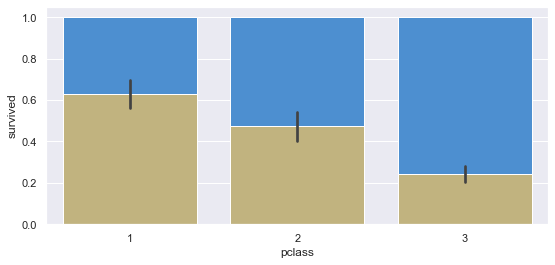

In [21]:
#不同仓位等级中幸存和遇难的乘客比例（堆积柱状图）
titanic_df['totle'] = 1
fig, ax = plt.subplots(1,1) 
sns.barplot(x = "pclass", y  = "totle", data = titanic_df,color='#378fe6')
sns.barplot(x = "pclass",y  = "survived",data = titanic_df ,color='y')

总结：从柱状图中很容易看出，一等舱获比例最大，达到百分之六十多，二等舱大概有一半获救，三等舱死亡率明显最高，很显然是否获救跟所买船舱有很大关系

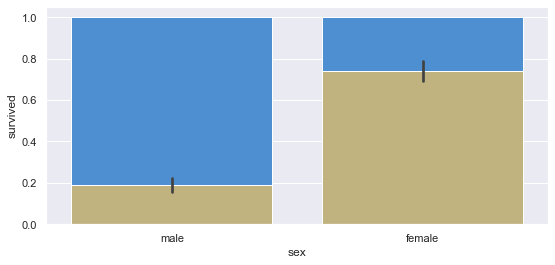

In [22]:
#不同性别的幸存比例（堆积柱状图）
fig,ax = plt.subplots(1,1)
sns.barplot(x = 'sex',y= 'totle',data = titanic_df,color='#378fe6')
sns.barplot(x = 'sex',y = 'survived',data = titanic_df,color='y')

- 女性获救概率明显比男性大，这也跟先救妇女儿童这个原则匹配

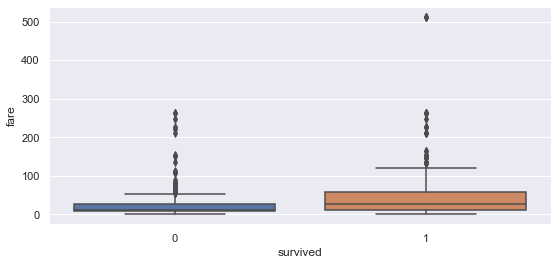

In [23]:
# 幸存和遇难乘客的票价分布（分类箱式图）
sns.boxplot(x='survived',y='fare',data=titanic_df)

- 票价越高存活率越高

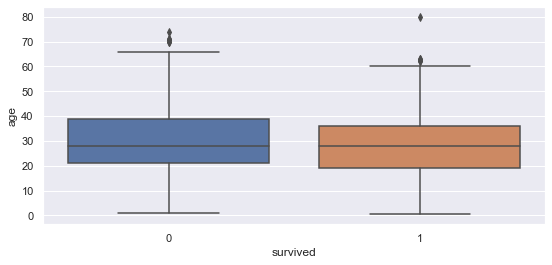

In [24]:
# 幸存和遇难乘客的年龄分布（分类箱式图）
sns.boxplot(x='survived',y='age',data=titanic_df)

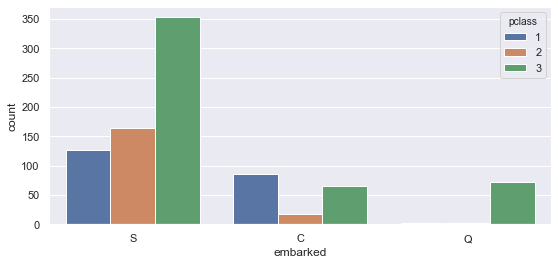

In [25]:
# 不同上船港口的乘客仓位等级分布（分组柱状图）
sns.countplot(x='embarked',hue='pclass',data=titanic_df)

- Q港登船人数三等舱比例最大，S港次之，C港最少，可能Q港是穷人聚集地，S港富人比较多，穷人比较少，C港两极分化

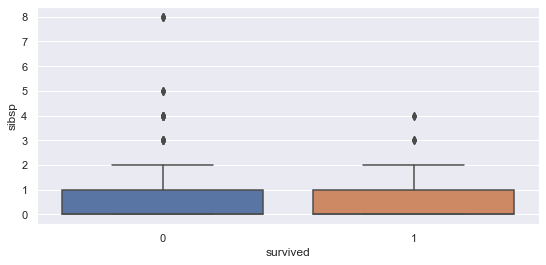

In [26]:
# 幸存和遇难乘客堂兄弟姐妹的数量分布（分类箱式图）
sns.boxplot(x='survived',y='sibsp',data=titanic_df)

- 幸存与遇难 和堂兄弟姐妹个数无关

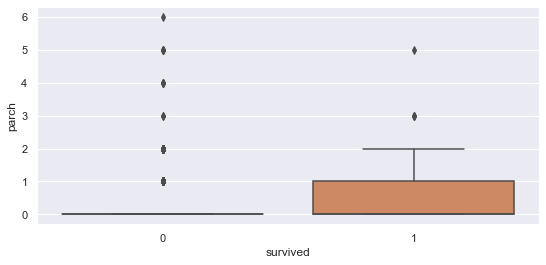

In [27]:
# 幸存和遇难乘客父母子女的数量分布（分类箱式图）
sns.boxplot(x='survived',y='parch',data=titanic_df)

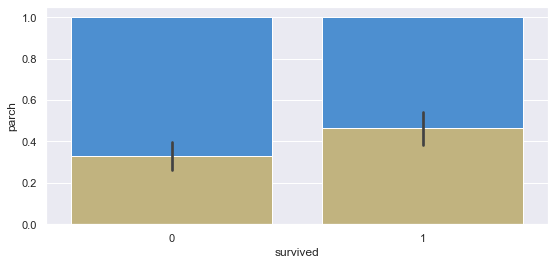

In [28]:
fig,ax = plt.subplots(1,1)
sns.barplot(x = 'survived',y= 'totle',data = titanic_df,color='#378fe6')
sns.barplot(x = 'survived',y = 'parch',data = titanic_df,color='y')

- 获救的人中子女或父母个数比未获救的子女或父母多

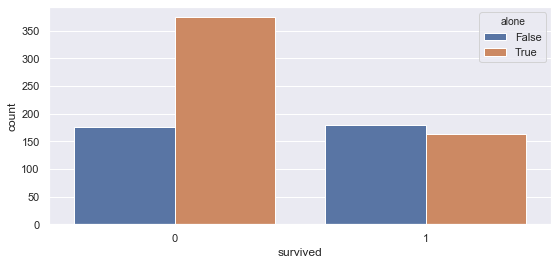

In [29]:
# 单独乘船与否和幸存之间有没有联系（堆积柱状图或者分组柱状图）
sns.countplot(x='survived',hue='alone',data=titanic_df)

- 单独乘船的死亡率明显比非单独乘船的高